In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Dataset/train.csv")

In [3]:
data.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(data)

In [5]:
m,n=data.shape
np.random.shuffle(data)

data_dev= data[0:1000].T
Y_dev=data_dev[0]
X_dev=data_dev[1:n]
X_dev=X_dev/255

data_train=data[1000:m].T
Y_train=data_train[0]
X_train=data_train[1:n]
X_train=X_train/255
_,m_train = X_train.shape

In [6]:
X_train[:,0].shape

(784,)

In [7]:
def init_params():
    w1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    w2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return w1, b1, w2, b2


In [8]:
def ReLU(z):
    return np.maximum(z,0)

def softmax(Z):
    return (np.exp(Z) / sum(np.exp(Z)))


In [9]:
def forward_prop(w1,b1,w2,b2,x):
    z1=w1.dot(x)+b1
    a1=ReLU(z1)
    z2=w2.dot(a1)+b2
    a2=softmax(z2)
    
    return z1,a1,z2,a2

def one_hot(y):
    one_hot_y=np.zeros((y.size,y.max()+1))
    one_hot_y[np.arange(y.size),y]=1
    one_hot_y=one_hot_y.T
    
    return one_hot_y

def deriv_ReLU(z):
    return z > 0
    
def back_prop(z1,a1,z2,a2,w1,w2,x,y):
    one_hot_y=one_hot(y)
    dz2=a2-one_hot_y
    dw2=1/m*dz2.dot(a1.T)
    db2=1/m*np.sum(dz2)
    dz1=(w2.T).dot(dz2) * deriv_ReLU(z1)
    dw1=1/m*dz1.dot(x.T)
    db1=1/m*np.sum(dz1)
    
    return dw1,db1,dw2,db2

def update_para(w1,b1,w2,b2,dw1,db1,dw2,db2,alpha):
    w1=w1-alpha*dw1
    b1=b1-alpha*db1
    w2=w2-alpha*dw2
    b2=b2-alpha*db2
    
    return w1,b1,w2,b2

In [10]:
def get_perdic(a2):
    return np.argmax(a2,0)

def get_accu(predic,y):
    return np.sum(predic==y)/y.size


def gradient_desent(x,y,alpha,iterations):
    w1,b1,w2,b2=init_params()
    for i in range(iterations):
        z1,a1,z2,a2=forward_prop(w1,b1,w2,b2,x)
        dw1,db1,dw2,db2=back_prop(z1,a1,z2,a2,w1,w2,x,y)
        w1,b1,w2,b2=update_para(w1,b1,w2,b2,dw1,db1,dw2,db2,alpha)
        if i%10==0:
            print("iterations :",i)
            print("Accuracy :",get_accu(get_perdic(a2),y))
    return w1,b1,w2,b2

In [11]:
w1,b1,w2,b2=gradient_desent(X_train,Y_train,0.05,1000)

iterations : 0
Accuracy : 0.0908780487804878
iterations : 10
Accuracy : 0.10729268292682927
iterations : 20
Accuracy : 0.13397560975609757
iterations : 30
Accuracy : 0.1983658536585366
iterations : 40
Accuracy : 0.2299268292682927
iterations : 50
Accuracy : 0.24958536585365854
iterations : 60
Accuracy : 0.26078048780487806
iterations : 70
Accuracy : 0.27258536585365856
iterations : 80
Accuracy : 0.282
iterations : 90
Accuracy : 0.293390243902439
iterations : 100
Accuracy : 0.308
iterations : 110
Accuracy : 0.32434146341463416
iterations : 120
Accuracy : 0.34448780487804875
iterations : 130
Accuracy : 0.37441463414634146
iterations : 140
Accuracy : 0.4137560975609756
iterations : 150
Accuracy : 0.4504878048780488
iterations : 160
Accuracy : 0.48085365853658535
iterations : 170
Accuracy : 0.5064146341463415
iterations : 180
Accuracy : 0.5298048780487805
iterations : 190
Accuracy : 0.550439024390244
iterations : 200
Accuracy : 0.5686097560975609
iterations : 210
Accuracy : 0.5849756097560

In [12]:
def make_pradic(x,w1,b1,w2,b2):
    _,_,_,a2=forward_prop(w1,b1,w2,b2,x)
    predic=get_perdic(a2)
    return predic

def test_presic(index,w1,b1,w2,b2):
    current_img=X_train[:,index,None]
    predic=make_pradic(current_img,w1,b1,w2,b2)
    label=Y_train[index]
    print("Prediction :",predic)
    print("Label :",label)
    
    current_img=current_img.reshape((28,28))*255
    plt.gray()
    plt.imshow(current_img,interpolation="nearest")
    plt.show()

Prediction : [0]
Label : 0


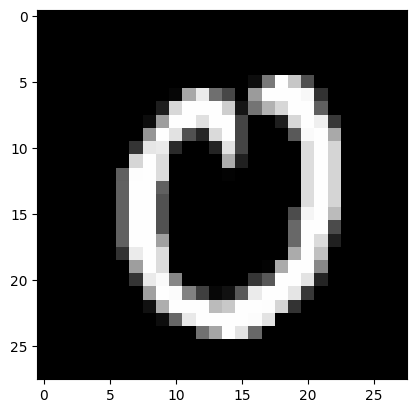

In [13]:
test_presic(3455,w1,b1,w2,b2)

In [14]:
a=range(0,40999)
print(a)

range(0, 40999)


In [15]:
print(w1,'/n',b1,'/n',w2,'/n',b2)

[[ 0.33926695 -0.17165701  0.48801941 ... -0.07390591  0.22578402
   0.42361269]
 [-0.11478074  0.33255945 -0.06899917 ...  0.47425868 -0.26684705
   0.0888296 ]
 [-0.26309681  0.35375426  0.37417263 ... -0.23929562  0.12009242
   0.30820181]
 ...
 [ 0.15222127  0.36151433  0.34942704 ... -0.44270645  0.48973464
  -0.42811958]
 [-0.17533694  0.47755249 -0.28899826 ...  0.00898005  0.1546435
  -0.3061585 ]
 [-0.16157041  0.11337078  0.01384792 ... -0.42075306  0.01543373
  -0.02765939]] /n [[0.46671728]
 [0.30793257]
 [0.38522133]
 [0.17988873]
 [0.70645543]
 [0.4575204 ]
 [0.26304249]
 [0.63274855]
 [0.67502101]
 [0.32467327]] /n [[ 0.09432239 -0.54436663 -0.51817052  0.0451856   0.62140893 -0.33349284
  -0.076708    0.08995487  0.17945091  0.71776925]
 [-0.13107855 -0.5646072   0.84305284 -0.27509716 -0.64833694 -0.20526022
   0.28693674 -0.18554991  0.0591883  -0.39023423]
 [ 0.29027225 -0.31314838  0.32839936 -0.30354669  0.47518545  0.47059234
  -0.27019138  0.11490595  0.33060719 

4720
Prediction : [9]
Label : 9


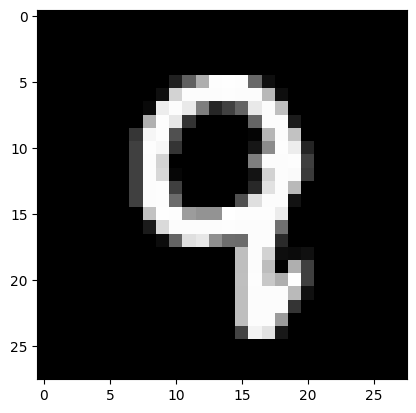

20561
Prediction : [2]
Label : 8


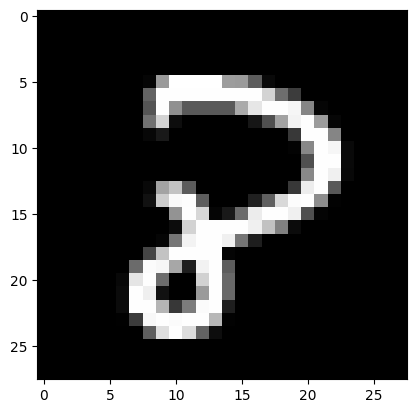

16272
Prediction : [7]
Label : 2


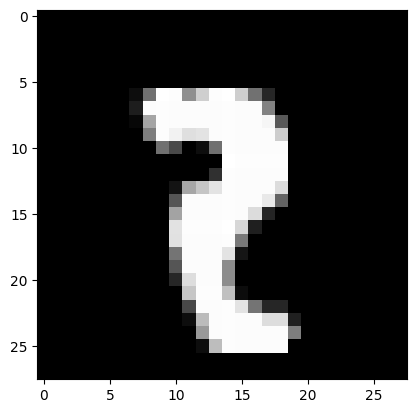

15230
Prediction : [3]
Label : 3


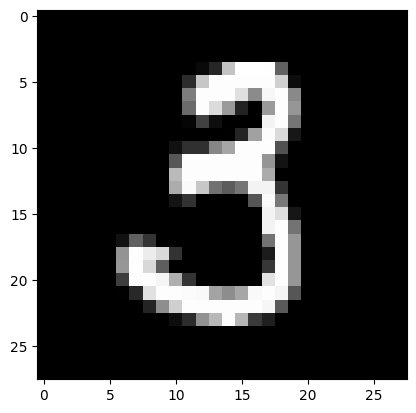

16223
Prediction : [7]
Label : 7


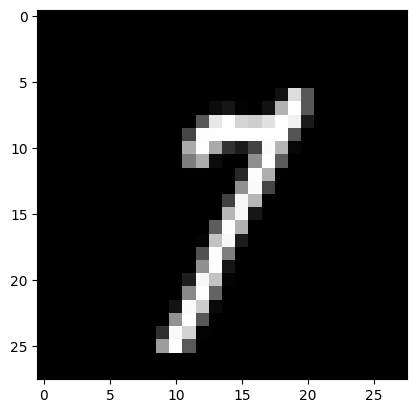

5223
Prediction : [7]
Label : 7


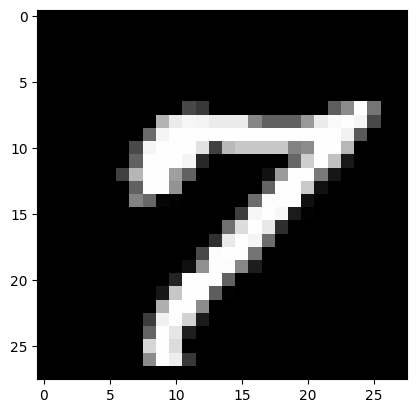

5268
Prediction : [9]
Label : 9


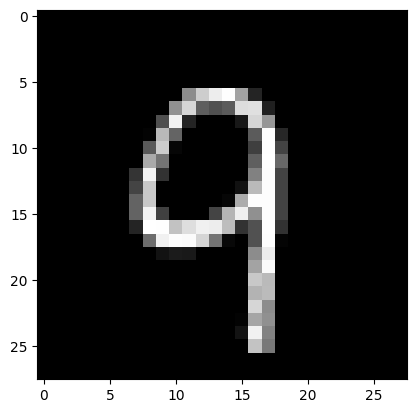

9431
Prediction : [1]
Label : 1


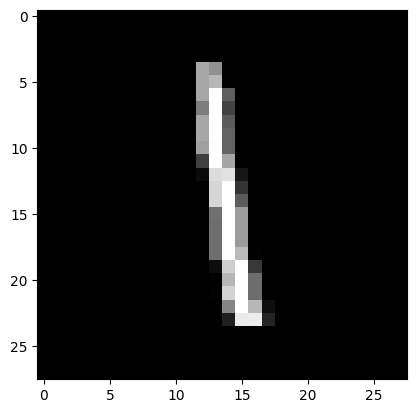

28081
Prediction : [5]
Label : 5


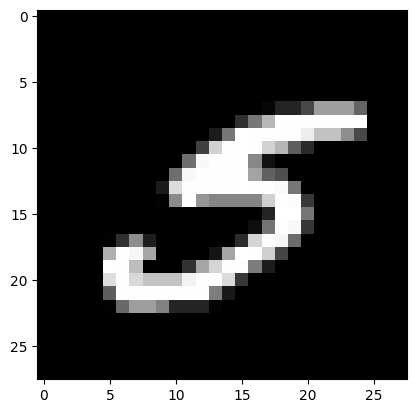

11464
Prediction : [7]
Label : 7


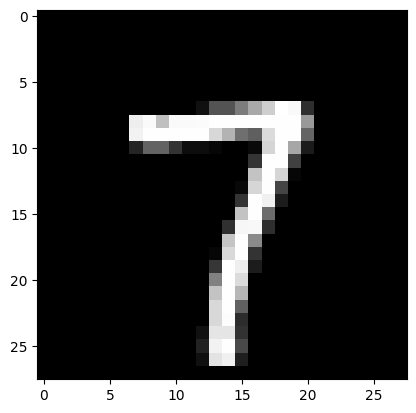

33350
Prediction : [1]
Label : 1


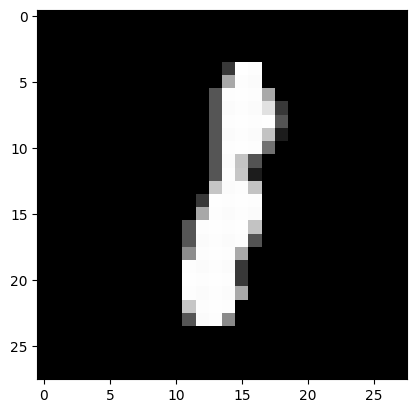

3233
Prediction : [3]
Label : 5


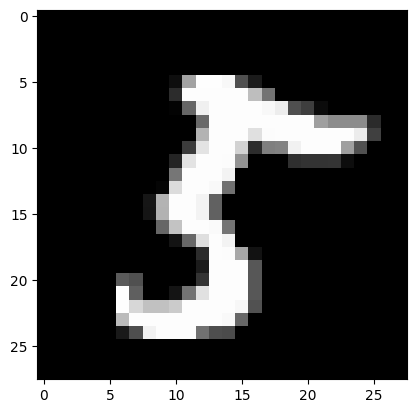

18894
Prediction : [6]
Label : 6


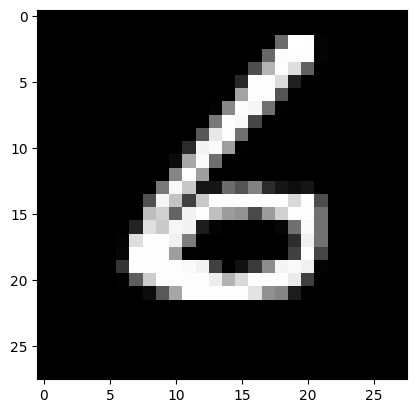

17739
Prediction : [0]
Label : 0


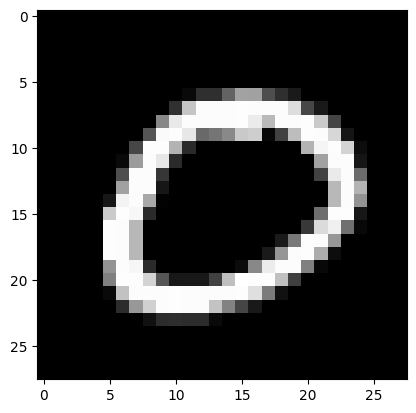

32464
Prediction : [7]
Label : 7


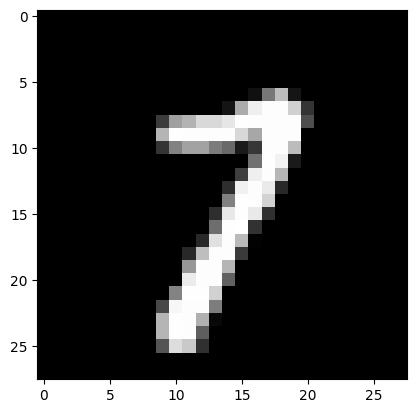

In [16]:
import random
 

for i in range(0, 15):
     y = random.randrange(40999)
     print(y)
     test_presic(y,w1,b1,w2,b2)

In [17]:
dev_predic=make_pradic(X_dev,w1,b1,w2,b2)
get_accu(dev_predic,Y_dev)

0.836